In [5]:
 import pandas as pd
 data = pd.read_csv(r"C:\Users\Sandhya\OneDrive\Desktop\Coffee_Sales Analysis Project\coffee.csv")

In [6]:
data.head()

,id,date,day,month,datetime,hour,cash_type,card,money,coffee_name
0,1,01-03-2024,Friday,Mar,15:50.5,10:15:51,card,ANON-0000-0000-0001,38.7,Latte
1,2,01-03-2024,Friday,Mar,19:22.5,12:19:23,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,3,01-03-2024,Friday,Mar,20:18.1,12:20:18,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,4,01-03-2024,Friday,Mar,46:33.0,13:46:33,card,ANON-0000-0000-0003,28.9,Americano
4,5,01-03-2024,Friday,Mar,48:14.6,13:48:15,card,ANON-0000-0000-0004,38.7,Latte


In [7]:
print(data.isnull().sum())

id              0
date            0
day             0
month           0
datetime        0
hour            0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


In [14]:
data_clean = data.dropna()

In [15]:
data.duplicated().sum()

0

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1133.0,567.000000,327.213233,1.00,284.0,567.00,850.00,1133.0
money,1133.0,33.105808,5.035366,18.12,28.9,32.82,37.72,40.0


In [17]:
data.loc[:,['cash_type','card','coffee_name']].describe().T

,count,unique,top,freq
cash_type,1133,2,card,1044
card,1044,446,ANON-0000-0000-0012,88
coffee_name,1133,8,Americano with Milk,268


In [18]:
data[data['card'].isnull()]['cash_type'].value_counts()

cash_type
cash    89
Name: count, dtype: int64

<Axes: >

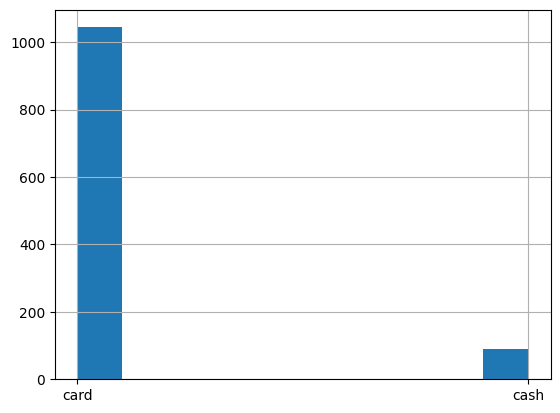

In [19]:
 data['cash_type'].hist()

In [20]:
data['cash_type'].value_counts(normalize=True)

cash_type
card    0.921447
cash    0.078553
Name: proportion, dtype: float64

In [21]:
pd.DataFrame(data['coffee_name'].value_counts(normalize=True).sort_values(ascending=False).round(4)*100)

,proportion
coffee_name,
Americano with Milk,23.65
Latte,21.45
Cappuccino,17.30
Americano,14.92
Cortado,8.74
Hot Chocolate,6.53
Espresso,4.32
Cocoa,3.09


In [24]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')
data['month']=data['date'].dt.strftime('%Y-%m')
data['day']=data['date'].dt.strftime('%w')
data['hour']=data['datetime'].dt.strftime('%H')

In [25]:
data.head()

,id,date,day,month,datetime,hour,cash_type,card,money,coffee_name
0,1,2024-01-03,3,2024-01,2025-05-03 15:50:30,15,card,ANON-0000-0000-0001,38.7,Latte
1,2,2024-01-03,3,2024-01,2025-05-03 19:22:30,19,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,3,2024-01-03,3,2024-01,2025-05-03 20:18:06,20,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,4,2024-01-03,3,2024-01,NaT,NaN,card,ANON-0000-0000-0003,28.9,Americano
4,5,2024-01-03,3,2024-01,NaT,NaN,card,ANON-0000-0000-0004,38.7,Latte


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           1133 non-null   int64         
 1   date         391 non-null    datetime64[ns]
 2   day          391 non-null    object        
 3   month        391 non-null    object        
 4   datetime     479 non-null    datetime64[ns]
 5   hour         479 non-null    object        
 6   cash_type    1133 non-null   object        
 7   card         1044 non-null   object        
 8   money        1133 non-null   float64       
 9   coffee_name  1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 88.6+ KB


In [27]:
 [data['date'].min(),data['date'].max()]

[Timestamp('2024-01-03 00:00:00'), Timestamp('2024-12-07 00:00:00')]

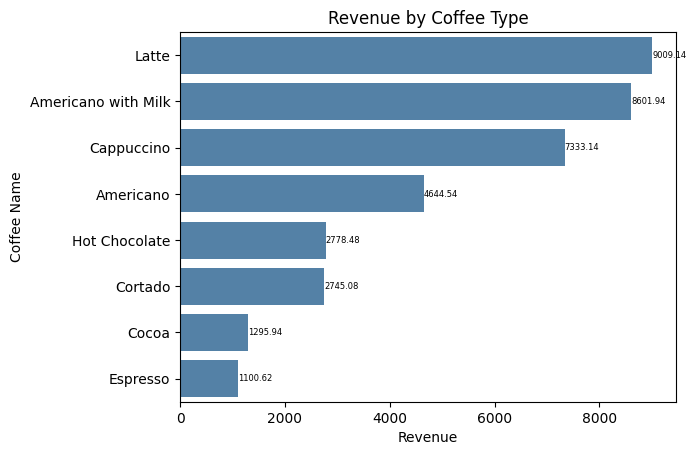

In [10]:
 import pandas as pd
 data = pd.read_csv(r"C:\Users\Sandhya\OneDrive\Desktop\Coffee_Sales Analysis Project\coffee.csv")
revenue = data.groupby(['coffee_name'])['money'].sum().reset_index().sort_values(by='money', ascending=False)
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming revenue_data is already created
ax = sns.barplot(data=revenue, x='money', y='coffee_name', color='steelblue')
ax.bar_label(ax.containers[0], fontsize=6)
plt.title('Revenue by Coffee Type')
plt.xlabel('Revenue')
plt.ylabel('Coffee Name')
plt.show()

In [28]:
monthly_sales = (
    data.groupby(['coffee_name', 'month'])
    .count()['date']
    .reset_index()
    .rename(columns={'date': 'count'})
    .pivot(index='month', columns='coffee_name', values='count')
    .reset_index()
)
monthly_sales


coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-01,2.0,12.0,5.0,3.0,1.0,1.0,4.0,4.0
1,2024-02,7.0,11.0,4.0,NaN,1.0,NaN,NaN,7.0
2,2024-03,2.0,8.0,5.0,1.0,4.0,1.0,2.0,10.0
3,2024-04,1.0,7.0,3.0,NaN,4.0,1.0,2.0,7.0
4,2024-05,7.0,6.0,4.0,4.0,4.0,3.0,4.0,7.0
5,2024-06,7.0,8.0,8.0,NaN,3.0,NaN,NaN,9.0
6,2024-07,2.0,7.0,10.0,3.0,5.0,2.0,4.0,6.0
7,2024-08,7.0,6.0,6.0,NaN,2.0,1.0,NaN,6.0
8,2024-09,9.0,9.0,9.0,NaN,3.0,2.0,5.0,9.0
9,2024-10,2.0,4.0,2.0,NaN,1.0,3.0,3.0,10.0


In [24]:
 monthly_sales.describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,14.0,40.0
Americano with Milk,30.0,66.0
Cappuccino,15.0,52.0
Cocoa,4.0,9.0
Cortado,14.0,28.0
Espresso,4.0,14.0
Hot Chocolate,10.0,20.0
Latte,27.0,56.0


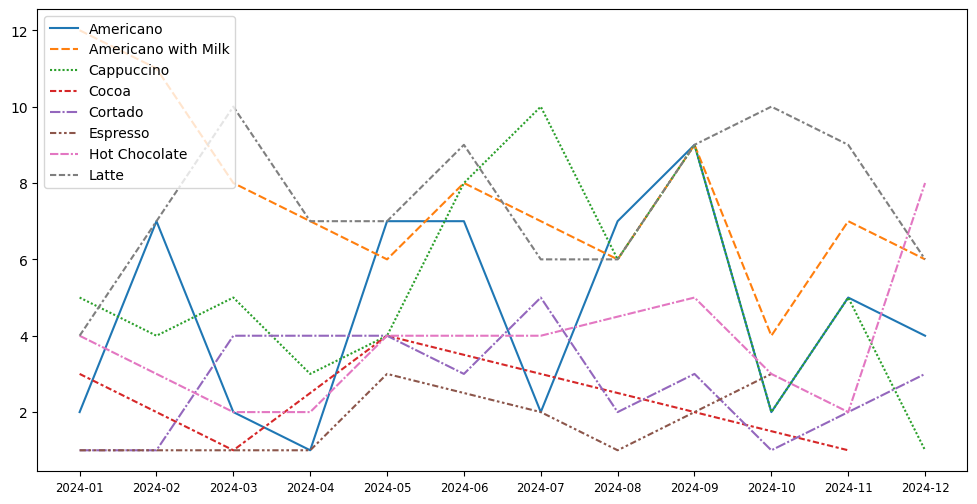

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales)
plt.legend(loc='upper left')
plt.xticks(ticks=range(len(monthly_sales['month'])), labels=monthly_sales['month'], fontsize='small')
plt.show()

In [32]:
 import pandas as pd
 data = pd.read_csv(r"C:\Users\Sandhya\OneDrive\Desktop\Coffee_Sales Analysis Project\coffee.csv")
weekday_sales = (
     data.groupby('day')
    .count()['date']
    .reset_index()
    .rename(columns={'date': 'count'})
)
weekday_sales

,day,count
0,Friday,163
1,Monday,151
2,Saturday,154
3,Sunday,151
4,Thursday,164
5,Tuesday,185
6,Wednesday,165


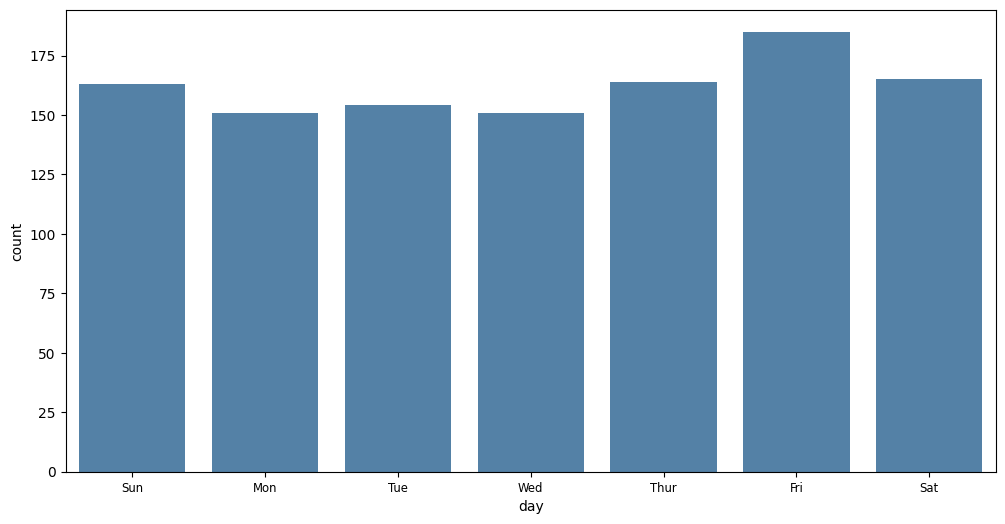

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(data=weekday_sales,x='day',y='count',color='steelblue')
plt.xticks(range(len(weekday_sales['day'])),['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],size='small')
plt.show()

In [34]:
daily_sales = (
    data.groupby(['coffee_name', 'date'])
    .count()['datetime']
    .reset_index()
    .rename(columns={'datetime': 'count'})
    .pivot(index='date', columns='coffee_name', values='count')
    .reset_index()
    .fillna(0)
)
daily_sales

coffee_name,date,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,01-03-2024,1.0,4.0,0.0,1.0,0.0,0.0,3.0,2.0
1,01-04-2024,1.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0
2,01-06-2024,0.0,4.0,2.0,2.0,1.0,0.0,0.0,2.0
3,01-07-2024,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
4,02-03-2024,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
145,30-06-2024,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
146,30-07-2024,2.0,12.0,2.0,0.0,3.0,2.0,0.0,3.0
147,31-03-2024,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
148,31-05-2024,0.0,4.0,2.0,1.0,1.0,0.0,1.0,5.0


In [35]:
 daily_sales.iloc[:,1:].describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,0.0,5.0
Americano with Milk,0.0,12.0
Cappuccino,0.0,9.0
Cocoa,0.0,2.0
Cortado,0.0,4.0
Espresso,0.0,4.0
Hot Chocolate,0.0,4.0
Latte,0.0,7.0


In [36]:
hourly_sales = (
    data.groupby('hour')
    .count()['date']
    .reset_index()
    .rename(columns={'date': 'count'})
)
hourly_sales

,hour,count
0,07:33:06,1
1,07:33:08,1
2,07:40:59,1
3,07:41:11,1
4,07:44:19,1
...,...,...
1119,22:48:11,1
1120,22:49:52,1
1121,22:51:25,1
1122,22:55:37,1


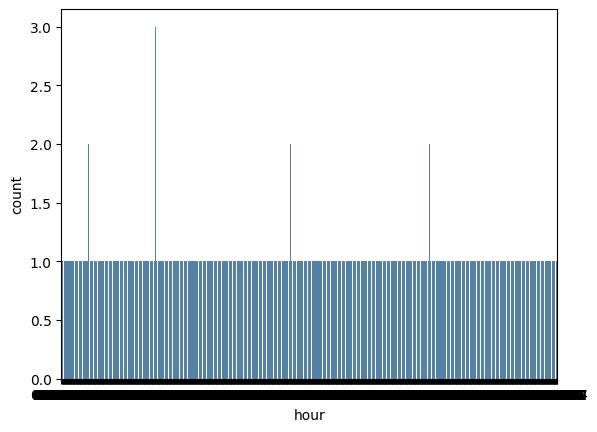

In [37]:
sns.barplot(data=hourly_sales,x='hour',y='count',color='steelblue')
plt.show()

In [38]:
 hourly_sales_by_coffee=(
 data.groupby(['hour','coffee_name'])
.count()['date']
.reset_index()
.rename(columns={'date':'count'})
.pivot(index='hour',columns='coffee_name',values='count')
.fillna(0)
.reset_index()
 )
 hourly_sales_by_coffee

coffee_name,hour,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,07:33:06,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,07:33:08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,07:40:59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,07:41:11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,07:44:19,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1119,22:48:11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1120,22:49:52,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1121,22:51:25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1122,22:55:37,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


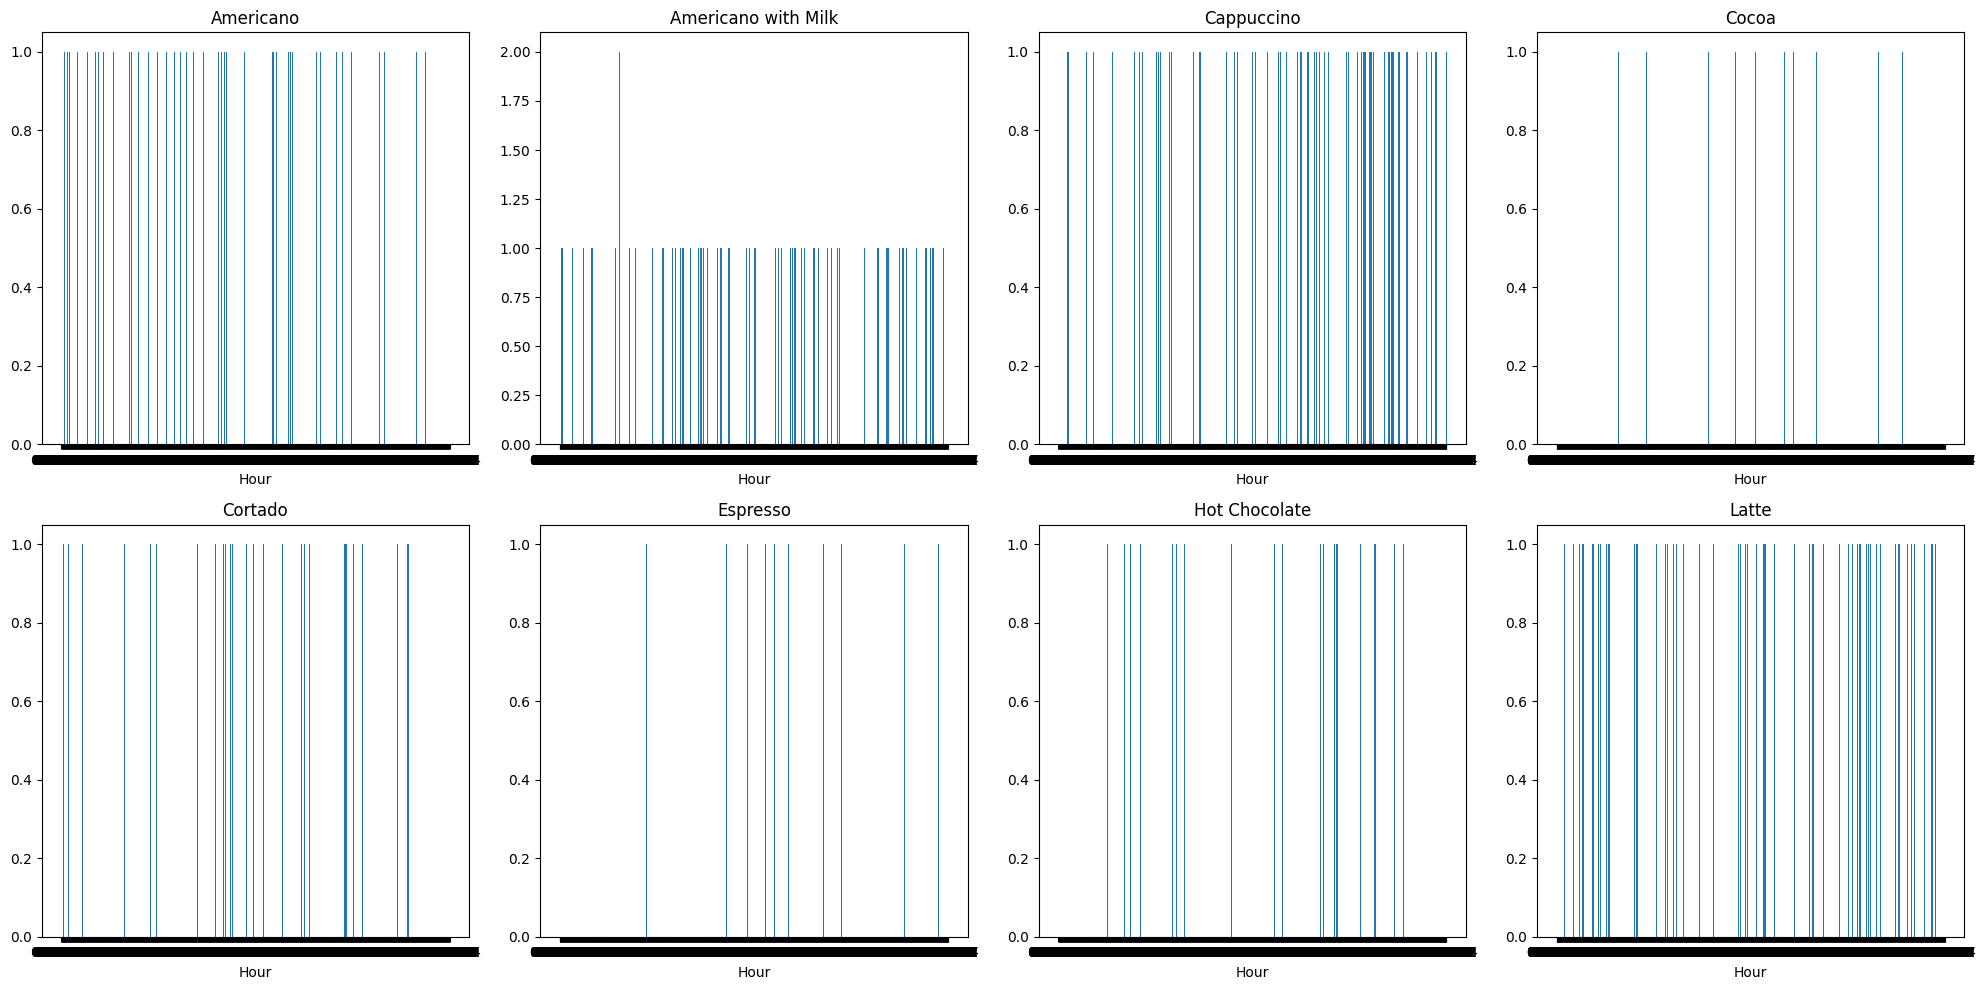

In [39]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Flatten the array of subplots for easy iteration
axs = axs.flatten()

# Loop through each column in the DataFrame, skipping the first column ('hour')
for i, column in enumerate(hourly_sales_by_coffee.columns[1:]):
    axs[i].bar(hourly_sales_by_coffee['hour'], hourly_sales_by_coffee[column])
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('Hour')
    # axs[i].set_ylabel('Sales')  # Uncomment if needed

plt.tight_layout()

# Show the plot
plt.show()
